In [1]:
import sympy 
sympy.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control


import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

def resultplot1(K, tau, theta, y0):
    plt.figure(figsize=(21, 7))
    plt.scatter(ts, ym)
    plt.plot(ts, fopdt(ts, K, tau, theta, y0), color='red')
    plt.grid(True)

def resultplot2(K, tau, zeta, theta, y0):
    plt.figure(figsize=(21, 7))
    plt.scatter(ts, ym)
    plt.plot(ts, sopdt(ts, K, tau, zeta,theta, y0), color='red')
    plt.grid(True)
    


# Sintonización de controladores PID

# Diseño directo

In [2]:
GP = control.tf([0.27], [4.489, 1])
GP

TransferFunction(array([0.27]), array([4.489, 1.   ]))

In [3]:
a0= pd.read_csv('C:\\Users\\jgall\\OneDrive\\Documentos\\ControlAnalogo\\DatosJS.csv')
df = a0 [a0['Tiempo'] > 19] 
df.head()

,Tiempo,Entrada,Salida
39,19.5,20,6.785451
40,20.0,80,6.755044
41,20.5,80,6.724637
42,21.0,80,7.552863
43,21.5,80,9.080447


In [4]:
ym = df.Salida-20
ts = df.Tiempo-20
interact(resultplot2, K=(0.0, 20.0), tau=(0., 20.), 
         theta=(0., 20.), zeta = (0, 20.0), y0=(-20., 20.));

interactive(children=(FloatSlider(value=10.0, description='K', max=20.0), FloatSlider(value=10.0, description=…

In [5]:
p_inicial = [16.4, 2, 1.3, 0.0, -13.3]
[K_1, tau_1, zeta_1, theta_1, y0_1], pcov = scipy.optimize.curve_fit(sopdt, ts, ym, p_inicial)
[K_1, tau_1, zeta_1, theta_1, y0_1]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

Se define el comportamiento deseado.

In [6]:
k_11=K_1/60
k_11

In [7]:
n_pade,d_pade = control.pade(theta_1,1)
GPP_pade = control.tf([0.27],[4.489,1])*control.tf(n_pade,d_pade)
GPP_pade

TransferFunction(array([-0.27      ,  1.21489428]), array([ 4.489     , 21.19874232,  4.49960845]))

In [12]:
tauC = 3

Se calculan los parámetros del PID 

In [13]:
KC1 = -2*tau_1*zeta_1/(k_11*(theta_1 - tauC))
TD1 = tau_1/(2*zeta_1)
TI1 = 2*tau_1*zeta_1
[KC1,TI1,TD1]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [14]:
GC_PID1 = KC1*(1 + control.tf(1,[TI1,0]) + control.tf([TD1,0],1))
GC_PID1

TransferFunction(array([13.0722758 , 33.60378483,  6.93250341]), array([4.84727995, 0.        ]))

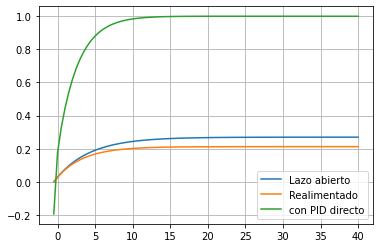

In [15]:
_, yLA = control.step_response(GP,ts)
_, yLC1 = control.step_response(control.feedback(GP,1),ts)
_, yLCPID1 = control.step_response(control.feedback(GC_PID1*GPP_pade,1),ts)

plt.plot(ts,yLA,
         ts,yLC1,
         ts,yLCPID1)
plt.legend(('Lazo abierto','Realimentado','con PID directo'))
plt.grid()


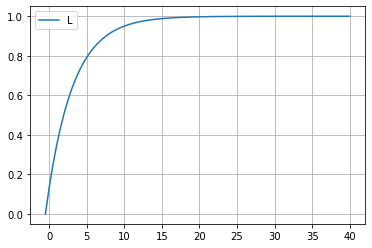

In [13]:
TM = 1.3
TAU = 3.5
GPRUEBA = control.tf([1],[TAU,1])
_, yPRUEBALA = control.step_response(GPRUEBA,ts)
plt.plot(ts,yPRUEBALA)
plt.legend(('Lazo abierto'))
plt.grid()

In [14]:
NUM_TM,DEN_TM = control.pade(TM,1)
TM_TF = control.tf(NUM_TM,DEN_TM)
TM_TF

TransferFunction(array([-1.        ,  1.53846154]), array([1.        , 1.53846154]))

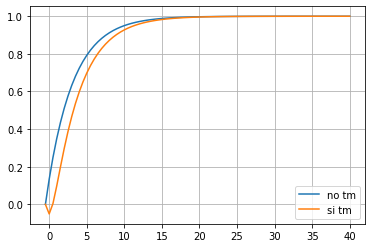

In [15]:
_, yPRUEBALA_TM = control.step_response(GPRUEBA*TM_TF,ts)
plt.plot(ts,yPRUEBALA,ts,yPRUEBALA_TM)
plt.legend(('no tm','si tm'))
plt.grid()

In [16]:
GPRUEBA*TM_TF

TransferFunction(array([-1.        ,  1.53846154]), array([3.5       , 6.38461538, 1.53846154]))

## Reglas de sintonía

[Ziegler y Nichols](https://controlautomaticoeducacion.com/control-realimentado/ziegler-nichols-sintonia-de-control-pid/) propusieron métodos para sintonizar un controlador PID.

### En lazo abierto
El método está desarrollado para sistemas cuya respuesta ante un escalón unitario tienen forma de $S$., es decir, sin sobreimpulsos ni dinámicas inestables. En este caso, el sistema puede aproximarse mediante un modelo de primer orden y tiempo muerto:

$$\frac{K}{\tau s + 1}e^{-Ls}$$


como se muestra en la figura.

<img src="figuras/RespOrden1delay.png" width=500em>

A partir de este modelo, se sugieren los siguientes valores para los compensadores:

| Controlador | $K_C$               | $\tau_I$       | $\tau_D$ |
|-------------|---------------------|----------------|----------|
| P           |$\frac{\tau}{KL}$    | $\infty$       | $0$      |
| PI          |$0.9\frac{\tau}{KL}$ |$\frac{L}{0.3}$ | $0$      |
| PID         |$1.2\frac{\tau}{KL}$ |$2L$            | $0.5L$   |


In [16]:
ym = df.Salida
ts = df.Tiempo
interact(resultplot1, K=(-30, 30.0), tau=(-30., 30.), 
         theta=(-30., 30.), y0=(-20., 30.));

interactive(children=(FloatSlider(value=0.0, description='K', max=30.0, min=-30.0), FloatSlider(value=0.0, des…

In [17]:
p_inicial = [16.50, 4.50, 20.70, 6.60]
[K_2, tau_2, theta_2, y0_2], pcov = scipy.optimize.curve_fit(fopdt, ts, ym, p_inicial)
[K_2, tau_2, theta_2, y0_2]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

$$ G_p = \frac{K_p}{\tau s +1} e^{-s \theta}$$

In [24]:
n_pade,d_pade = control.pade(theta_2,1)
Gp_pade = control.tf([K_2/60],[tau_2,1])*control.tf(n_pade,d_pade)
Gp_pade
#control.pzmap(Gp_pade);

TransferFunction(array([-0.27367758,  0.02628027]), array([4.48901292, 1.43106378, 0.09602641]))

In [19]:
KC2 = 1.2*tau_2/(K_2/60*theta_2)
TI2 = 2*theta_2
TD2 = 0.5*theta_2
[KC2,TI2,TD2]


In [20]:
KC2,TI2,TD2 = (0.95,41.66,10.41)

In [21]:
GC_PID2 = KC2*(1 + control.tf(1,[TI2,0]) + control.tf([TD2,0],[0.001*TD2,1]))
GC_PID2

TransferFunction(array([412.40856657,  39.5868895 ,   0.95      ]), array([ 0.4336806, 41.66     ,  0.       ]))

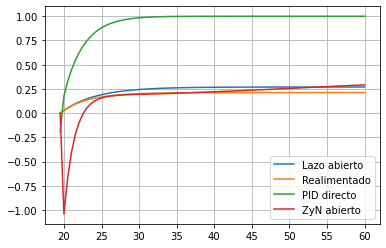

In [22]:

_, yLCPID2 = control.step_response(control.feedback(GC_PID2*Gp_pade,1),ts)

plt.plot(ts,yLA,
         ts,yLC1,
         ts,yLCPID1,
         ts,yLCPID2)
plt.legend(('Lazo abierto','Realimentado','PID directo','ZyN abierto'))
plt.grid()


Utilizando los dos métodos para el diseño del controlador que fueron Reglas de sintonía Ziegler y Nichols y Diseño directo se obtuvo un mejor resultado por el diseño directo, ya que por el otro método, en  las gráficas se evidencia que no se estabiliza y no llega al valor deseado. 